# Fit Basic Emma's Models 

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import glob
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
import sys
sys.path.append("../functions/")
import imp

import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

/Users/chris/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('../data/data_emmas_logfiles_from_mat_1_15_17/S'+str(0)+'.csv')

In [4]:

# Fit a model to the ambiguous gain trials 
out = fit_model_split_amb_unamb_gain_loss(df, whichreturn='ambig_shock', params=['mag_diff','log_prob_diff','ambiguityLevel'],zscore=True)
out['results'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:                          Logit   Df Residuals:                      100
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jan 2018   Pseudo R-squ.:                  0.5023
Time:                        13:37:21   Log-Likelihood:                -34.241
converged:                       True   LL-Null:                       -68.803
                                        LLR p-value:                 6.577e-15
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -1.1265      0.354     -3.187      0.001      -1.819      -0.434
mag_diff_amb_gain         -2.3065      0.649     -3.552      0.000      -3.579      -1.034
log_prob_diff_amb_gain    -3.8161      0.807     -4.726      0.000      -5.399      -2.233
ambiguityLevel_gain       -0.7634      0.333     -2.294      0.022      -1.416      -0.111
==========================================================================================
"""

In [5]:
df.loc[df['revealed_ambi']==1.0,].head(10)

,Unnamed: 0,resp_r_1,prob_x_l,prob_x_r,mag_left,mag_right,info_amb,num_revealed,revealed_x_r,resp_amb_1,...,prob_x_ambig_bayes_emmas,prob_x_ambig_bayes_mine,prob_x_ambig_bayes,info_amb_sqrt,ambig_r,ambig_l,ambiguityLevel,revealed_ambi,gain_or_loss_trial,MID
0,0,1.0,0.34,0.24,0.48,0.29,1.0,50.0,12.0,1.0,...,NaN,0.250000,0.250000,1.0,0,0.0,0.0,1.0,gain,S0
1,1,0.0,0.16,0.54,0.38,0.64,1.0,50.0,27.0,0.0,...,NaN,0.538462,0.538462,1.0,0,0.0,0.0,1.0,gain,S0
4,4,1.0,0.40,0.28,0.07,0.08,1.0,50.0,14.0,1.0,...,NaN,0.288462,0.288462,1.0,0,0.0,0.0,1.0,gain,S0
6,6,1.0,0.28,0.36,0.87,0.84,1.0,50.0,18.0,1.0,...,NaN,0.365385,0.365385,1.0,0,0.0,0.0,1.0,gain,S0
9,9,0.0,0.26,0.56,0.40,0.68,1.0,50.0,28.0,0.0,...,NaN,0.557692,0.557692,1.0,0,0.0,0.0,1.0,gain,S0
12,12,0.0,0.18,0.76,0.12,0.87,1.0,50.0,38.0,0.0,...,NaN,0.750000,0.750000,1.0,0,0.0,0.0,1.0,gain,S0
15,15,0.0,0.20,0.24,0.38,0.39,1.0,50.0,12.0,0.0,...,NaN,0.250000,0.250000,1.0,0,0.0,0.0,1.0,gain,S0
18,18,0.0,0.60,0.92,0.20,0.54,1.0,50.0,46.0,0.0,...,NaN,0.903846,0.903846,1.0,0,0.0,0.0,1.0,gain,S0
19,19,1.0,0.48,0.08,0.29,0.16,1.0,50.0,4.0,1.0,...,NaN,0.096154,0.096154,1.0,0,0.0,0.0,1.0,gain,S0
21,21,1.0,0.48,0.28,0.58,0.21,1.0,50.0,14.0,1.0,...,NaN,0.288462,0.288462,1.0,0,0.0,0.0,1.0,gain,S0


In [6]:
# Fit a model to the unambiguous gain trials 
#df['resp_r_1']=1.0-df['resp_r_1']
out = fit_model_split_amb_unamb_gain_loss(df, whichreturn='unambig_shock', params=['mag_diff','prob_diff'],zscore=True)
out['results'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            2
Date:                Thu, 18 Jan 2018   Pseudo R-squ.:                  0.6179
Time:                        13:37:21   Log-Likelihood:                -24.778
converged:                       True   LL-Null:                       -64.845
                                        LLR p-value:                 3.977e-18
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.6741      0.514     -3.254      0.001      -2.682      -0.666
mag_diff_rl_gain     -3.4338      0.954     -3.598      0.000      -5.304      -1.563
prob_diff_rl_gain    -6.0130      1.384     -4.344      0.000      -8.726      -3.300
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Fit models

In [7]:
# get trial data 
datadir = '../data/data_emmas_logfiles_from_mat_1_15_17/S*'
files = glob.glob(datadir)
filee = files[1]
print(len(files))

32


In [8]:
df = pd.read_csv(filee)
#df

In [9]:
param_sets_split = {}
param_sets_split['0'] = ['mag_diff','log_prob_diff']
param_sets_split['1'] = ['mag_diff','log_prob_diff','ambiguityLevel']

In [10]:
resultnames = ['bic','aic','pseudoR2','pred_acc', 'llr_pvalue'] 
model_param_df = np.array(['','','',3.0, 3.0])
model_summary_df = pd.DataFrame(data=np.arange(32).astype('str'),columns=['MID'])

for sub in range(32):
    
    # exclude 31
    if sub is not 30:
    
        df = pd.read_csv('../data/data_emmas_logfiles_from_mat_1_15_17/S'+str(sub)+'.csv')
        MID = str(sub)

        for split in ['ambig_shock','unambig_shock']: #'unambig_shock'
                #print(split)
                if 'unambig' in split:
                    paramnum='0'
                else:
                    paramnum='1'
                # Fit a model to the ambiguous gain trials 
                out = fit_model_split_amb_unamb_gain_loss(df, whichreturn= split, params=param_sets_split[paramnum],zscore=True)


                modelname = out['modelname']

                for result in resultnames:
                    model_summary_df.loc[(model_summary_df.MID== MID),result+'_'+split]=out[result]

                params = out['params']
                se = out['se']
                for param in params.index:
                    paramn = param.replace('_gain','')
                    paramn = paramn.replace('_amb','')
                    paramn = paramn.replace('_rl','')
                    row = np.array([MID,paramn,split,params[param],se[param]])
                    model_param_df=np.vstack((model_param_df,row))
                #print(params)
                #print(MID)

model_param_df = pd.DataFrame(model_param_df,columns=['MID','parameter','split','beta', 'se'])
model_param_df= model_param_df.loc[1:,]
model_param_df.MID=model_param_df.MID.astype('str')
model_param_df['beta']=model_param_df['beta'].astype('float')
model_param_df_shock = model_param_df        
model_summary_shock_df = model_summary_df
    
    

In [11]:
model_param_df.head()

,MID,parameter,split,beta,se
1,0,intercept,ambig_shock,-1.126521,0.353525122285
2,0,mag_diff,ambig_shock,-2.306468,0.649341912321
3,0,log_prob_diff,ambig_shock,-3.816050,0.80748224445
4,0,ambiguityLevel,ambig_shock,-0.763402,0.332827043614
5,0,intercept,unambig_shock,-1.615580,0.500915026783


In [12]:
model_summary_shock_df.head()

,MID,bic_ambig_shock,aic_ambig_shock,pseudoR2_ambig_shock,pred_acc_ambig_shock,llr_pvalue_ambig_shock,bic_unambig_shock,aic_unambig_shock,pseudoR2_unambig_shock,pred_acc_unambig_shock,llr_pvalue_unambig_shock
0,0,87.059562,76.481999,0.502330,0.846154,6.576599e-15,63.957440,56.264396,0.612424,0.906250,5.663996e-18
1,1,86.513296,75.935732,0.313044,0.865385,8.674587e-07,77.353672,69.660627,0.520299,0.864583,1.014690e-15
2,2,94.798210,84.220647,0.380858,0.807692,3.674672e-10,85.776708,78.083663,0.458191,0.812500,5.793452e-14
3,3,125.147146,114.569582,0.235981,0.682692,3.355043e-07,77.962622,70.269578,0.511556,0.864583,2.419114e-15
4,4,101.514363,90.936799,0.419157,0.778846,6.328036e-13,79.508053,71.815008,0.499811,0.875000,5.238926e-15


In [13]:
# get bdi
dictt = scipy.io.loadmat('../data/data_emmas_1_15_18/DataMatrix_AllfMRI_FinalSubjects.mat')

/Users/chris/anaconda/lib/python3.6/site-packages/scipy/io/matlab/mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [14]:
data= np.vstack((np.arange(32).astype('str'),dictt['Trait_fmri'][0,:])).T
STAI_df = pd.DataFrame(data=data,columns=['MID','TraitAnxiety'])
STAI_df.head()

,MID,TraitAnxiety
0,0,41
1,1,33
2,2,41
3,3,41
4,4,34


In [15]:
model_param_df=model_param_df.merge(STAI_df,on='MID')

In [16]:
model_param_df.head()

,MID,parameter,split,beta,se,TraitAnxiety
0,0,intercept,ambig_shock,-1.126521,0.353525122285,41
1,0,mag_diff,ambig_shock,-2.306468,0.649341912321,41
2,0,log_prob_diff,ambig_shock,-3.816050,0.80748224445,41
3,0,ambiguityLevel,ambig_shock,-0.763402,0.332827043614,41
4,0,intercept,unambig_shock,-1.615580,0.500915026783,41


In [17]:
model_param_df.parameter.unique()

array(['intercept', 'mag_diff', 'log_prob_diff', 'ambiguityLevel'], dtype=object)

In [18]:
from scipy.stats import spearmanr

In [19]:
model_param_df.MID.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '31'], dtype=object)

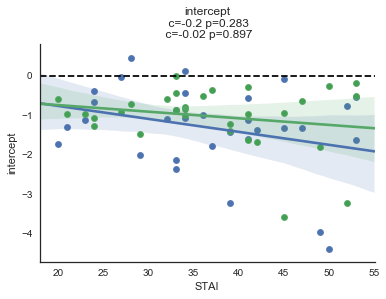

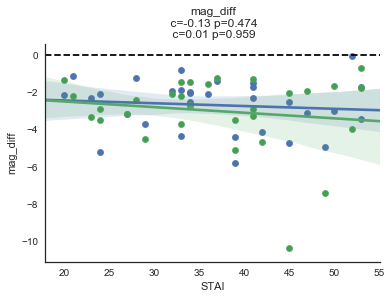

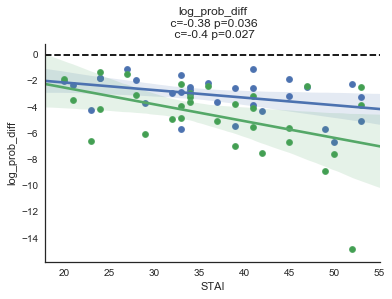

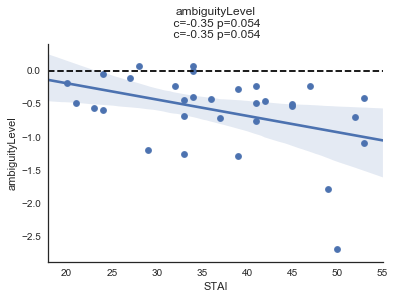

In [20]:
sns.set_style('white')

for pi, parameter in enumerate(model_param_df.parameter.unique()):
    plt.figure()
    y = model_param_df.loc[(model_param_df.parameter==parameter)&(model_param_df.split=='ambig_shock'),
                           'beta'].as_matrix()
    
    x = model_param_df.loc[(model_param_df.parameter==parameter)&(model_param_df.split=='ambig_shock'),
                           'TraitAnxiety'].as_matrix().astype('float')
    plt.scatter(x,y,s=30)
    r,p = spearmanr(x,y)
    sns.regplot(x,y)
    
    if pi<3:
        y = model_param_df.loc[(model_param_df.parameter==parameter)&(model_param_df.split=='unambig_shock'),
                               'beta'].as_matrix()

        x = model_param_df.loc[(model_param_df.parameter==parameter)&(model_param_df.split=='unambig_shock'),
                               'TraitAnxiety'].as_matrix().astype('float')
        plt.scatter(x,y,c='g',s=30)
        sns.regplot(x,y)

    r2,p2 = spearmanr(x,y)
    plt.title(parameter+'\n c='+str(np.round(r,2))+' p='+str(np.round(p,3))+'\n c='+str(np.round(r2,2))+' p='+str(np.round(p2,3)))
    plt.xlabel('STAI')
    plt.ylabel(parameter)
    
    ax = plt.gca()
    ax.axhline(y=0,linestyle='--',c='k')

    sns.despine()

- I ran our model and it's the same result as Emmas data figures.
- I re-ran reversing the unambig v choosing ambig; 1-ambiguity vs ambiguity. 

## Comparing Parameters Directly


In [21]:
dictt = scipy.io.loadmat('../data/data_emmas_1_15_18/FinalModels_Jan2018_ChoseLeft_HiddenInfo.mat')

/Users/chris/anaconda/lib/python3.6/site-packages/scipy/io/matlab/mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [22]:
#for key in dictt.keys():
#    print(key)

In [23]:
# convert MID to int for sorting. 
model_param_df['MID']= model_param_df['MID'].astype('int')

In [24]:
def addstuff():
    sns.despine()
    ax = plt.gca()
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_xlabel('my parameter fits')
    ax.set_ylabel('emmas parameter fits')


rank corr: 1.0


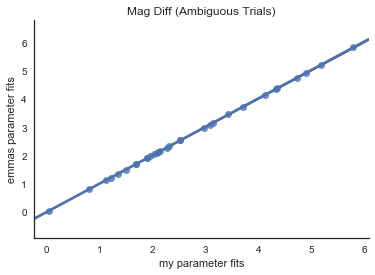

In [25]:
# mag diff ambiguous 
split = (model_param_df['split']=='ambig_shock')
param = (model_param_df['parameter']=='mag_diff')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1a'][1,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Mag Diff (Ambiguous Trials)')
addstuff()

rank corr: 1.0


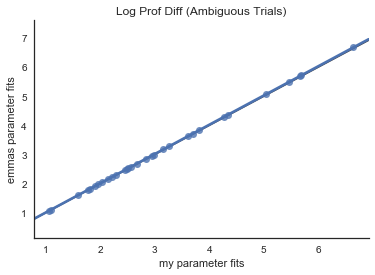

In [26]:
# mag diff ambiguous 
split = (model_param_df['split']=='ambig_shock')
param = (model_param_df['parameter']=='log_prob_diff')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1a'][2,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Log Prof Diff (Ambiguous Trials)')
addstuff()

rank corr: 1.0


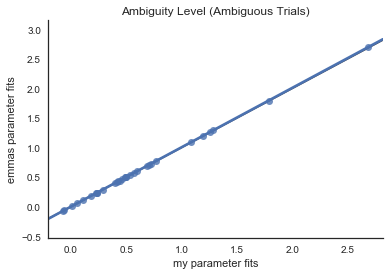

In [27]:
# mag diff ambiguous 
split = (model_param_df['split']=='ambig_shock')
param = (model_param_df['parameter']=='ambiguityLevel')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1a'][3,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Ambiguity Level (Ambiguous Trials)')
addstuff()

rank corr: 1.0


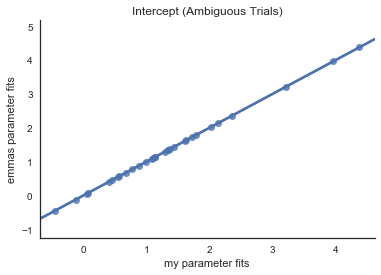

In [28]:
# mag diff ambiguous 
split = (model_param_df['split']=='ambig_shock')
param = (model_param_df['parameter']=='intercept')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1a'][0,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Intercept (Ambiguous Trials)')
addstuff()

rank corr: 1.0


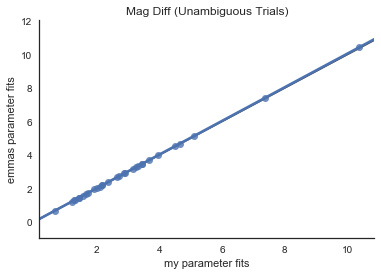

In [29]:
# mag diff ambiguous 
split = (model_param_df['split']=='unambig_shock')
param = (model_param_df['parameter']=='mag_diff')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1u'][1,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Mag Diff (Unambiguous Trials)')
addstuff()

rank corr: 1.0


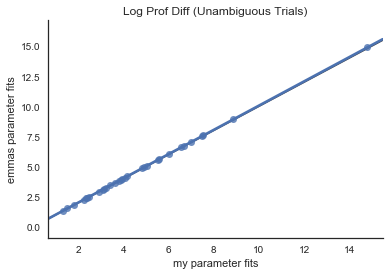

In [30]:
# mag diff ambiguous 
split = (model_param_df['split']=='unambig_shock')
param = (model_param_df['parameter']=='log_prob_diff')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1u'][2,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Log Prof Diff (Unambiguous Trials)')
addstuff()

rank corr: 1.0


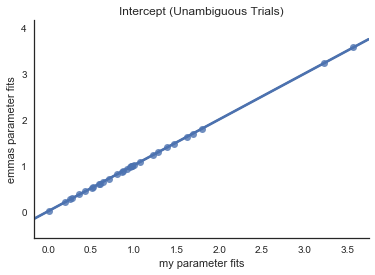

In [31]:
# mag diff ambiguous 
split = (model_param_df['split']=='unambig_shock')
param = (model_param_df['parameter']=='intercept')
my_param = -1.0*model_param_df.loc[split & param,].sort_values('MID')['beta'].as_matrix()# check 'MID'
em_param = dictt['betas_1u'][0,:]
c,p = spearmanr(my_param,em_param)
print('rank corr: {0}'.format(str(c)))
sns.regplot(my_param,em_param)
plt.title('Intercept (Unambiguous Trials)')
addstuff()